In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from scipy.stats import normaltest
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df = pd.read_csv('diamonds.csv',usecols = ['carat', 'cut', 'color', 'clarity', 'depth', 'table','price', 'x', 'y', 'z'])
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## EDA

In [3]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [6]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
df['cut'].value_counts().to_dict()
df['cut'].replace({'Ideal': 4,'Premium': 3,'Very Good': 2,'Good': 1,'Fair': 0},inplace = True)

In [8]:
df['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [9]:
df = pd.get_dummies(df,columns = ['color'])
df.head()

,carat,cut,clarity,depth,table,price,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,4,SI2,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0,0,0,0
1,0.21,3,SI1,59.8,61.0,326,3.89,3.84,2.31,0,1,0,0,0,0,0
2,0.23,1,VS1,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0,0,0
3,0.29,3,VS2,62.4,58.0,334,4.20,4.23,2.63,0,0,0,0,0,1,0
4,0.31,1,SI2,63.3,58.0,335,4.34,4.35,2.75,0,0,0,0,0,0,1


In [10]:
df['clarity'].value_counts().to_dict()
df['clarity'].replace({'SI1': 0,'VS2': 1,'SI2': 2,'VS1': 3,'VVS2': 4,'VVS1': 5,'IF':6,'I1':7},inplace = True)

In [11]:
df.head()

,carat,cut,clarity,depth,table,price,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,4,2,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0,0,0,0
1,0.21,3,0,59.8,61.0,326,3.89,3.84,2.31,0,1,0,0,0,0,0
2,0.23,1,3,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0,0,0
3,0.29,3,1,62.4,58.0,334,4.20,4.23,2.63,0,0,0,0,0,1,0
4,0.31,1,2,63.3,58.0,335,4.34,4.35,2.75,0,0,0,0,0,0,1


In [12]:
indep = df[['carat','depth','table','x','y','z']]

## Detecting Outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


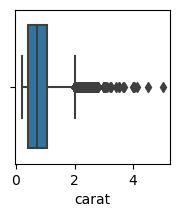

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


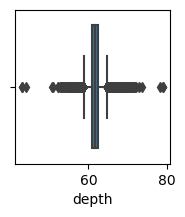

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


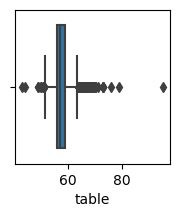

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


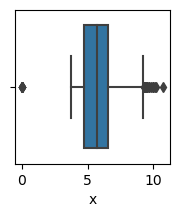

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


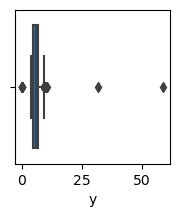

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


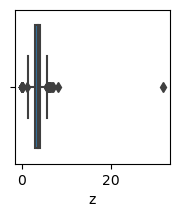

In [13]:
for i in indep.columns:
    plt.figure(figsize = (2,2))
    sns.boxplot(df[i])
    plt.show()

## Treating Outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


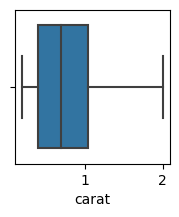

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


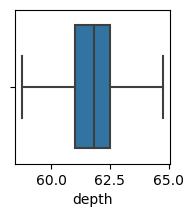

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


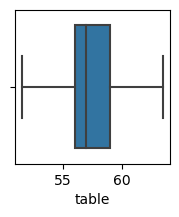

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


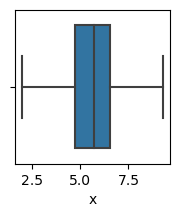

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


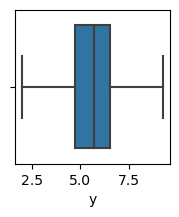

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


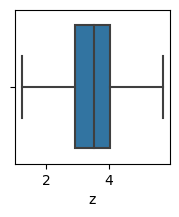

In [14]:
for i in indep.columns:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3-q1
    
    lt = q1 - 1.5*iqr
    ut = q3 + 1.5*iqr
    df.loc[df[i]<lt,i] = lt
    df.loc[df[i]>ut,i] = ut
    
    plt.figure(figsize = (2,2))
    sns.boxplot(df[i])
    plt.show()
    
    

## Linear Regression

## 1. Linearity

In [15]:
df.corr()[5:6]

,carat,cut,clarity,depth,table,price,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J
price,0.922484,-0.053491,-0.083125,-0.012521,0.130391,1.0,0.885704,0.88728,0.878004,-0.072473,-0.101089,-0.024161,0.008556,0.059223,0.097125,0.08171


## 2.independence

<AxesSubplot:>

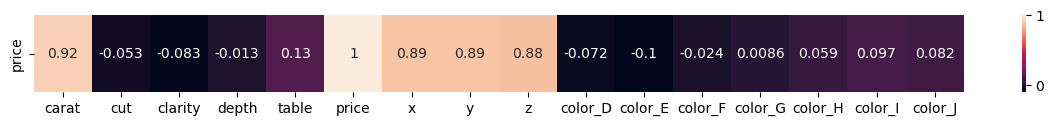

In [16]:
plt.figure(figsize = (15,1))
sns.heatmap(df.corr()[5:6],annot = True)

## 3. No multicollinearity

In [17]:
df1 = df.drop('price',axis = 1)
for i in range(len(df1.columns)):
    vif = variance_inflation_factor(df,i)
    print(f"VIF of {df1.columns[i]} = {vif}")

VIF of carat = 55.08775396046585
VIF of cut = 1.5194260645536344
VIF of clarity = 1.1075078597240222
VIF of depth = 3.125046054635619
VIF of table = 1.6259408366063501
VIF of x = 9.075363902073073
VIF of y = 364.31221826956477
VIF of z = 344.9735446201291
VIF of color_D = 117.1764984863927
VIF of color_E = 1463.0803706905422
VIF of color_F = 2114.6085015785566
VIF of color_G = 2060.6538790081045
VIF of color_H = 2439.254435230262
VIF of color_I = 1792.6001103900935
VIF of color_J = 1170.3154327021136


<AxesSubplot:xlabel='depth', ylabel='Density'>

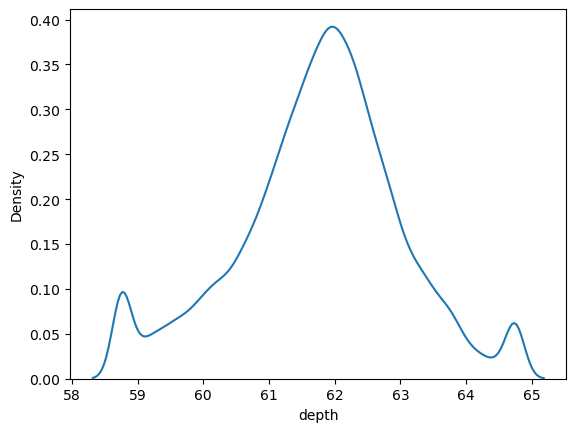

In [18]:
sns.kdeplot(df['depth'])

## Model Training

In [19]:
x1 = df.drop('price',axis = 1)
y1 = df['price']

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,random_state = 15,test_size = 0.3)

In [21]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((37758, 15), (16182, 15), (37758,), (16182,))

In [22]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [23]:
y_pred = model.predict(x_test)

In [24]:
residual = y_test-y_pred

<AxesSubplot:xlabel='price', ylabel='Density'>

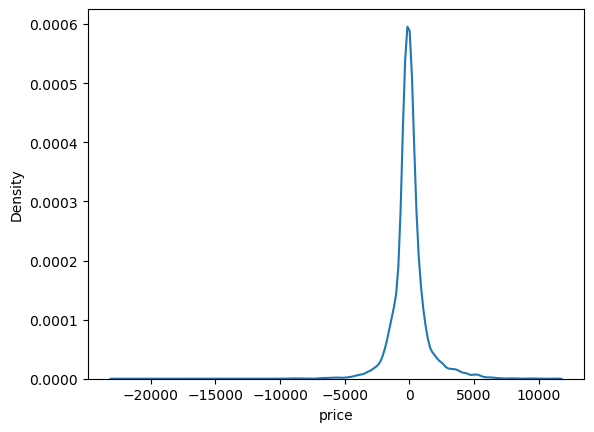

In [25]:
sns.kdeplot(residual)

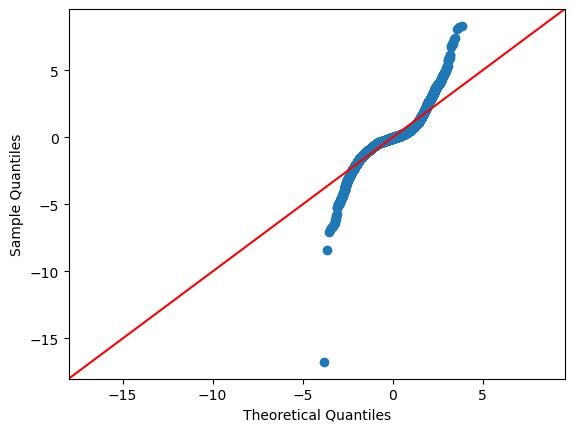

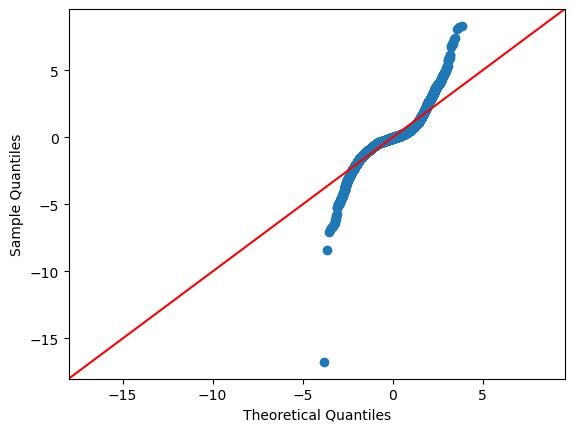

In [26]:
sm.qqplot(residual,stats.norm,fit = True,line = '45')

In [27]:
stats,p_value = normaltest(residual)
if p_value>0.05:
    print(f"p_value = {p_value}")
    print(f"Residuals are normally distributed")
    
else :
    print(f"p_value = {p_value}")
    print(f"Residuals are not normally distributed")

p_value = 0.0
Residuals are not normally distributed


## 5. Homoschedasticity

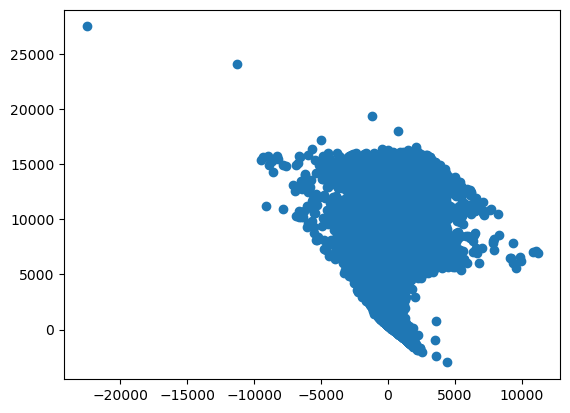

In [28]:
plt.scatter(residual,y_pred)

## Model Evaluation

In [29]:
def model_eval(x,y,model):
    y_pred = model.predict(x)
    
    residual = y - y_pred
    mse = mean_squared_error(y,y_pred)
    print(f"mse = {mse}")
    rmse = np.sqrt(mse)
    print(f"rmse ={rmse}")
    mae = mean_absolute_error(y,y_pred)
    print(f"mae = {mae}")

    r2 = r2_score(y,y_pred)
    print(f"r2_score = {r2}")
    return 

In [30]:
model_eval(x_test,y_test,model)

mse = 1810511.4898320853
rmse =1345.5524849786
mae = 819.7917109618872
r2_score = 0.88663655209768


In [31]:
model_eval(x_train,y_train,model)

mse = 1731039.4829572474
rmse =1315.6897365858135
mae = 802.269897430734
r2_score = 0.8910676853752503


### KNN

In [32]:
x2 = df.drop('price',axis = 1)
y2 = df['price']
normal_scaler = MinMaxScaler().fit(x2)

arr = normal_scaler.transform(x2)
x_norm = pd.DataFrame(arr,columns = x2.columns) 
x_norm.head()

,carat,cut,clarity,depth,table,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.016667,1.00,0.285714,0.458333,0.291667,0.271175,0.273352,0.268805,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.005556,0.75,0.000000,0.175000,0.791667,0.262978,0.254121,0.242257,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.016667,0.25,0.428571,0.000000,1.000000,0.284836,0.285714,0.242257,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.050000,0.75,0.142857,0.608333,0.541667,0.305328,0.307692,0.313053,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.061111,0.25,0.285714,0.758333,0.541667,0.324454,0.324176,0.339602,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [33]:
x_train,x_test,y_train,y_test = train_test_split(x_norm,y2,random_state = 42,test_size = 0.2)

In [34]:
knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [35]:
y_pred = knn.predict(x_test)
y_pred

array([  559.        ,  2255.        ,  1036.66666667, ...,
         649.33333333, 10436.66666667,  3206.66666667])

In [36]:
model_eval(x_test,y_test,knn)

mse = 653704.5398900012
rmse =808.5199687639144
mae = 419.3075948584848
r2_score = 0.9588782863357754


In [37]:
model_eval(x_train,y_train,knn)

mse = 324424.6667387633
rmse =569.5828883830371
mae = 286.66870596959586
r2_score = 0.9796212317327494


## Hyperparameter Tunning

In [38]:
from sklearn.model_selection import RandomizedSearchCV

In [39]:
knn_hype = KNeighborsRegressor(n_neighbors = 3)
hype = {'n_neighbors':np.arange(3,20),'p' :[1,2]}
rscv = RandomizedSearchCV(knn_hype,hype)
rscv.fit(x_train,y_train)

RandomizedSearchCV(estimator=KNeighborsRegressor(n_neighbors=3),
                   param_distributions={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'p': [1, 2]})

In [40]:
rscv.best_estimator_

KNeighborsRegressor(p=1)

In [41]:
knn_hp =KNeighborsRegressor(n_neighbors=7, p=1)
knn_hp.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=7, p=1)

In [42]:
model_eval(x_train,y_train,knn_hp)

mse = 430666.4542708073
rmse =656.2518222990374
mae = 328.9274458392923
r2_score = 0.9729476430991286


In [43]:
model_eval(x_test,y_test,knn_hp)

mse = 554707.5123606729
rmse =744.7868905671427
mae = 378.25538958631284
r2_score = 0.965105759408481


## User Defined Function

In [44]:
import pickle
import json

In [45]:
with open('diamond_model.pkl','wb') as file :
    pickle.dump(knn_hp,file)
    

In [46]:
with open('diamond_scale.pkl','wb') as file :
    pickle.dump(normal_scaler,file)

In [47]:
project_data = {"column_names":df1.columns.tolist(),
               'cut' : {'Ideal': 4,'Premium': 3,'Very Good': 2,'Good': 1,'Fair': 0},
                'clarity' : {'SI1': 0,'VS2': 1,'SI2': 2,'VS1': 3,'VVS2': 4,'VVS1': 5,'IF':6,'I1':7}
               }

with open('project_data.json','w') as file:
    json.dump(project_data,file)

In [72]:
carat=0.21
cut="Ideal"
clarity="SI2"
depth=61.0
table=55
x_name=3.89
y=3.84
z=2.31
color='E'

In [83]:
user_data = np.zeros(len(project_data['column_names']))

user_data[0]=carat

#cut
user_data[1]=project_data['cut'][cut]

#clarity
user_data[2]=project_data['clarity'][clarity]

user_data[3]=depth
user_data[4]=table
user_data[5]=x_name
user_data[6]=y
user_data[7]=z

#color
search_color='color_'+color ##(color_E)
index=np.where(project_data['column_names']==search_color)
user_data[index]=1

## prediction
scale=normal_scaler.transform([user_data])
result = knn.predict(scale)[0]
result

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


449.0

In [79]:
user_data

array([ 0.21,  4.  ,  2.  , 61.  , 55.  ,  3.89,  3.84,  2.31,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([449.])